Mean Square Error: 0.0
Mean Square Error: 0.0


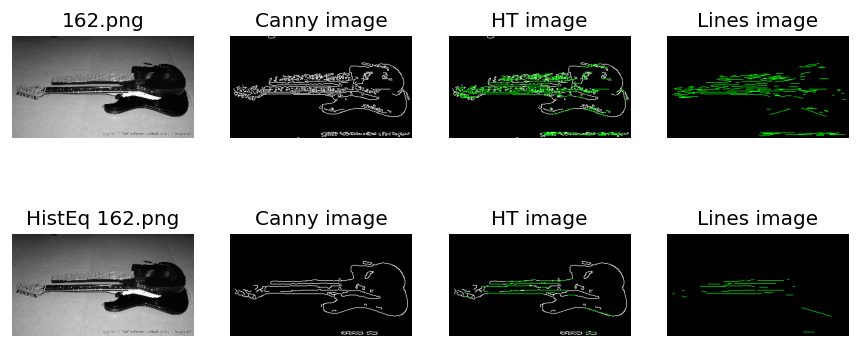

Mean Square Error: 0.0
Mean Square Error: 0.0


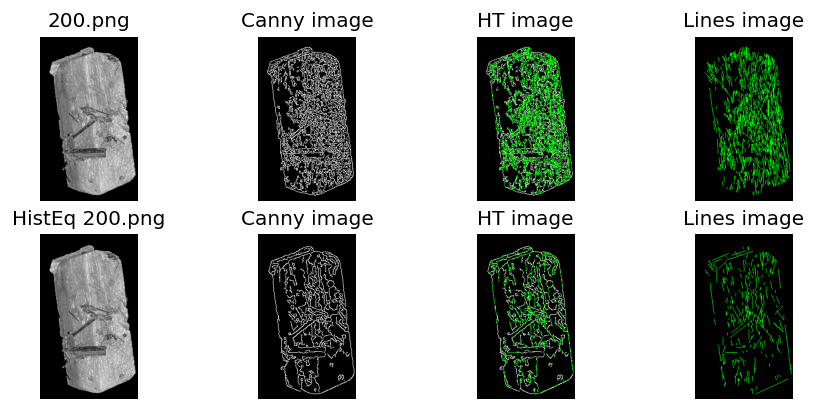

Mean Square Error: 0.0
Mean Square Error: 0.0


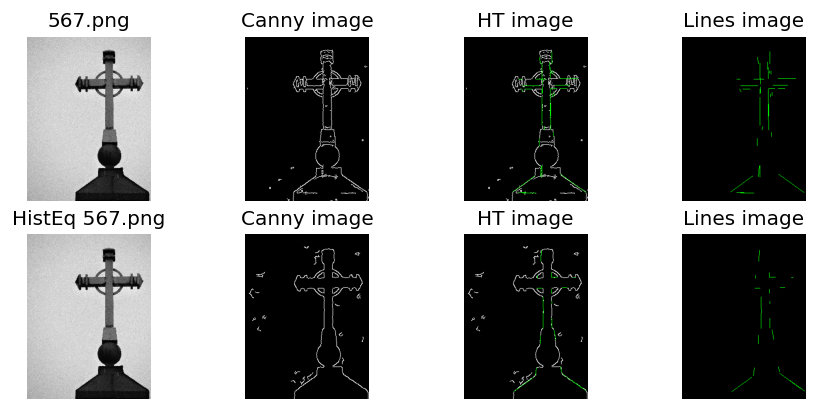

Mean Square Error: 0.0
Mean Square Error: 0.0


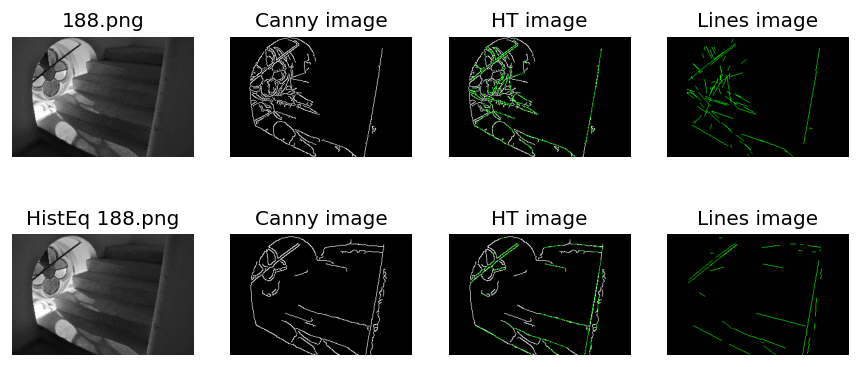

Mean Square Error: 0.0
Mean Square Error: 0.0


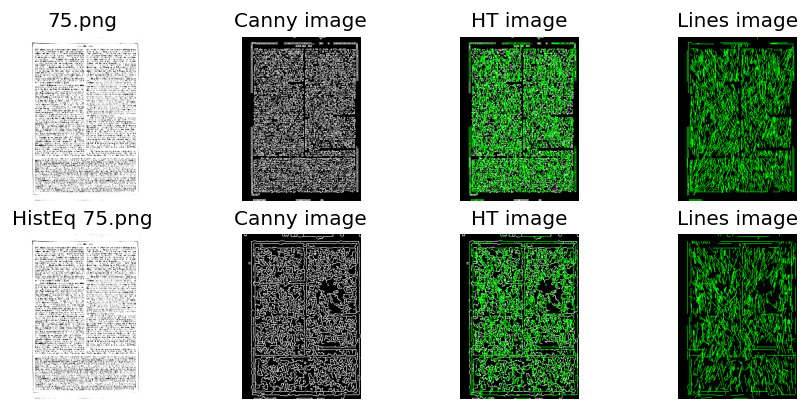

Mean Square Error: 0.0
Mean Square Error: 0.0


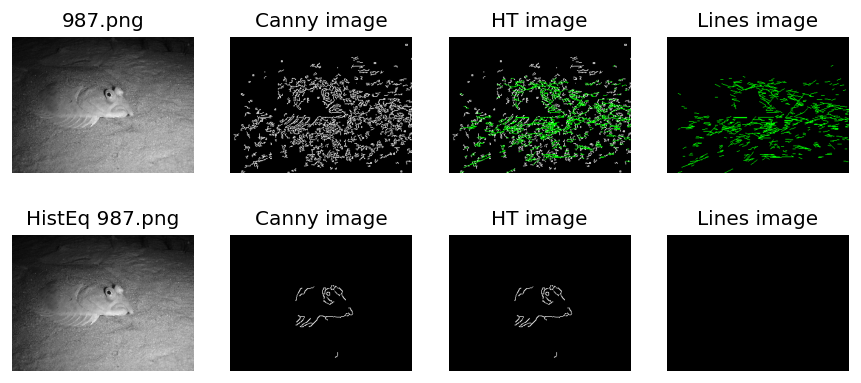

Mean Square Error: 0.0
Mean Square Error: 0.0


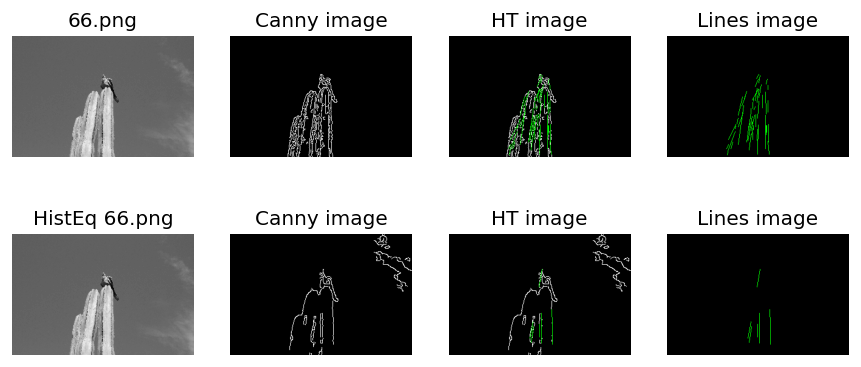

Mean Square Error: 0.0
Mean Square Error: 0.0


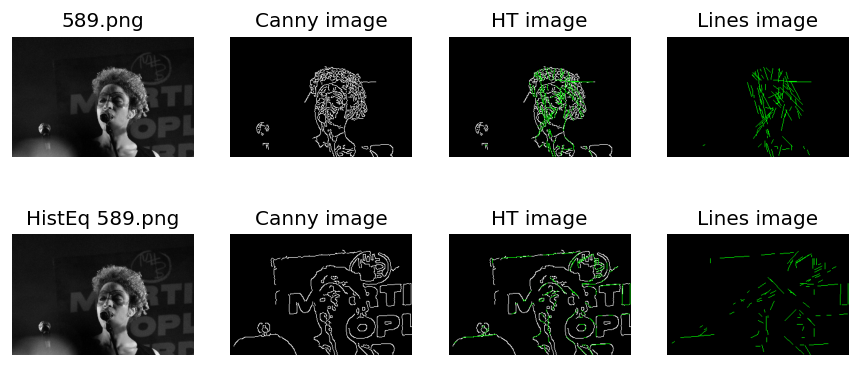

Mean Square Error: 0.0
Mean Square Error: 0.0


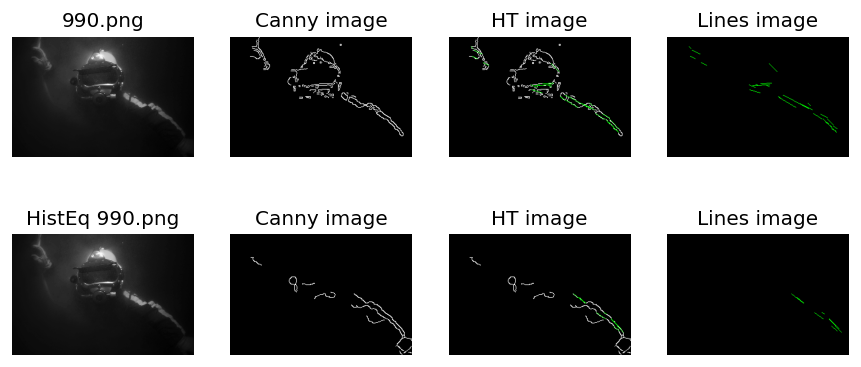

0

In [97]:
import os
import sys
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

images_dir = "./images/300px/"

def getAvg(array):
    length = len(array)
    total = 0
    for i in range(1,length):
        total = total + Average(array[i])
    return total / length

def msqErr(src,blank):
    #blank = cv.cvtColor(blank, cv.COLOR_RGB2GRAY)
    s_avg = np.zeros((len(src),len(src[0])),np.longdouble)
    b_avg = np.zeros((len(blank),len(blank[0])),np.longdouble)
    for i in range(1, len(src)):
        s_b, s_g, s_r = src[:,1], src[:,2], src[:,3]
        b_b, b_g, b_r = blank[:,1], blank[:,2], blank[:,3]
        #print(f"s_b: {s_b};; b_b: {b_b}")
        s_blue, s_green, s_red = s_b[i], s_g[i], s_r[i]
        b_blue, b_green, b_red = b_b[i].any(), b_g[i].any(), b_r[i].any()
        for j in range(1, len(src[i])):
            #print(f"blue {s_b}, green {s_g}, red {s_r}")
            #print(f"blue {b_b}, green {b_g}, red {b_r}")
            s = (float(s_blue) + float(s_green) + float(s_red))
            b = (float(b_blue) + float(b_green) + float(b_red))
            s_avg[i][j] = s
            b_avg[i][j] = b
    mse = np.square(np.subtract(s_avg,b_avg)).mean()#axis=0)
    return mse

def insSort(arr,img,err,file):
    if arr is not None:
        for i in range(1,len(arr)):
            key = arr[i][1]
            j = i-1
            while j >=0 and key < arr[j][1] :
                    arr[j+1] = arr[j]
                    j -= 1
            arr[j+1] = (img,err,file,0) 
    else:
        arr = [(img,err,file,0)]
    return arr

                      
def performers(arrOne,arrTwo):
    rankedTop = []
    rankedMid = []
    rankedPoor = []
    ret = []
    for i in range(1,len(arrOne)):
        filename = arrOne[i][2]
        rating = arrOne[i][1]
        for j in range(1,len(arrTwo)):
            if arrOne[i][2] == arrTwo[j][2]:
                rank = i-j
                if rank >= -5 and rank <= 5:
                    arrOne[i] = (arrOne[i][0], arrOne[i][1], arrOne[i][2], i)
                    rankedTop.append(arrOne[i])
                elif rank > 0:
                    arrOne[i] = (arrOne[i][0], arrOne[i][1], arrOne[i][2], i)
                    rankedMid.append(arrOne[i])
                elif rank < 0:
                    arrOne[i] = (arrOne[i][0], arrOne[i][1], arrOne[i][2], i)
                    rankedPoor.append(arrOne[i])
    #Sort top
    for i in range(0, len(rankedTop)):
        for j in range(0, len(rankedTop)-i-1):
            if (rankedTop[j][3] > rankedTop[j + 1][3]):
                temp = rankedTop[j]
                rankedTop[j]= rankedTop[j + 1]
                rankedTop[j + 1]= temp
    #Sort mid
    for i in range(0, len(rankedMid)):
        for j in range(0, len(rankedMid)-i-1):
            if (rankedMid[j][3] > rankedMid[j + 1][3]):
                temp = rankedMid[j]
                rankedMid[j]= rankedMid[j + 1]
                rankedMid[j + 1]= temp
    #Sort poor
    for i in range(0, len(rankedPoor)):
        for j in range(0, len(rankedPoor)-i-1):
            if (rankedPoor[j][3] < rankedPoor[j + 1][3]):
                temp = rankedPoor[j]
                rankedPoor[j]= rankedPoor[j + 1]
                rankedPoor[j + 1]= temp
    
    print('top')
    plt.figure(figsize=(9,4), dpi=120)
    length = 10 if 10 < len(rankedTop) else len(rankedTop)
    for i in range(0,length):
        plt.subplot(2,5,i+1)
        filepath = str(rankedTop[i][2])
        plt.imshow(cv.imread(os.path.join(images_dir, filepath), cv.IMREAD_GRAYSCALE), cmap='gray')
        plt.axis('off')
        plt.title(f'{rankedTop[i][2]}\n mse: {str(round(rankedTop[i][1],3))}\n')
    plt.tight_layout()
    plt.show()
    
    print('mid')
    plt.figure(figsize=(9,4), dpi=120)
    length = 10 if 10 < len(rankedMid) else len(rankedMid)
    for i in range(0,length):
        plt.subplot(2,5,i+1)
        filepath = str(rankedMid[i][2])
        plt.imshow(cv.imread(os.path.join(images_dir, filepath), cv.IMREAD_GRAYSCALE), cmap='gray')
        plt.axis('off')
        plt.title(f'{rankedMid[i][2]}\n mse: {str(round(rankedMid[i][1],3))}\n')
    plt.tight_layout()
    plt.show()
    
    print('poor')
    plt.figure(figsize=(9,4), dpi=120)
    length = 10 if 10 < len(rankedPoor) else len(rankedPoor)
    for i in range(0,length):
        plt.subplot(2,5,i+1)
        filepath = str(rankedPoor[i][2])
        plt.imshow(cv.imread(os.path.join(images_dir, filepath), cv.IMREAD_GRAYSCALE), cmap='gray')
        plt.axis('off')
        plt.title(f'{rankedPoor[i][2]}\n mse: {str(round(rankedPoor[i][1],3))}\n')
    plt.tight_layout()
    plt.show()
    return 0

def houghP(new,cdst,blank):
    lines = cv.HoughLinesP(new,1,np.pi / 180,threshold = 35,minLineLength = 3,maxLineGap=3)
    if lines is not None:
        for points in lines:
            x1, y1, x2, y2 = points[0]
            cv.line(blank, (x1, y1), (x2, y2), (255, 255, 255), 1)
            cv.line(cdst, (x1, y1), (x2, y2), (255, 255, 255), 1)
    
    return (new,cdst,blank)

def preprocessed(image):#(original):
    kernel = np.ones((5,5),np.uint8)
    edge_image = image
    edge_image = cv.equalizeHist(edge_image)
    edge_image = cv.GaussianBlur(edge_image, (5,5), 1)
    edge_image = cv.dilate(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.erode(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.GaussianBlur(edge_image, (3,3), 1)
    edge_image = cv.dilate(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.erode(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.Canny(edge_image, 75,175)#100, 200

    cdst = cv.cvtColor(edge_image, cv.COLOR_GRAY2BGR)
    blank = np.zeros((len(image),len(image[0])),np.uint8)
    #blank = cv.cvtColor(blank, cv.COLOR_GRAY2BGR)

    return houghP(edge_image,cdst,blank)


def htrans(img):
    new = cv.Canny(img, 75, 175)
    cdst = cv.cvtColor(new, cv.COLOR_GRAY2RGB)
    blank = np.zeros((len(img),len(img[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2RGB)

    return houghP(new, cdst , blank)

def run():
    resultArrays = []
    arrOne = []
    arrTwo = []
    for file in os.listdir(images_dir):
        path = os.path.join(images_dir, file)
        if os.path.isfile(path):
            source = cv.imread(path, cv.IMREAD_UNCHANGED)
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                
                res = htrans(img)
                
                resTwo = preprocessed(img)
                
                errOne = msqErr(res[0],res[2])
                errTwo = msqErr(resTwo[0],resTwo[2])
                '''
                plt.figure(figsize=(9,4), dpi=120)
                plt.margins(0,0)
                plt.subplot(2,4,1)
                plt.imshow(img, cmap="gray")
                plt.title(file)
                plt.axis('off')
                plt.subplot(2,4,2)
                plt.imshow(res[0], cmap="gray")
                plt.axis('off')
                plt.title('Canny image')
                plt.subplot(2,4,3)
                plt.title('HT image')
                plt.imshow(res[1])
                plt.axis('off')
                plt.subplot(2,4,4)
                plt.title('Lines image')
                plt.imshow(res[2])
                plt.axis('off')
                print('Mean Square Error: ' + str(errOne))
                
                plt.subplot(2,4,5)
                plt.imshow(img, cmap="gray")
                plt.axis('off')
                plt.title('HistEq ' + file)
                plt.subplot(2,4,6)
                plt.imshow(resTwo[0], cmap="gray")
                plt.axis('off')
                plt.title('Canny image')
                plt.subplot(2,4,7)
                plt.title('HT image')
                plt.imshow(resTwo[1])
                plt.axis('off')
                plt.subplot(2,4,8)
                plt.title('Lines image')
                plt.imshow(resTwo[2])
                plt.axis('off')
                print('Mean Square Error: ' + str(errTwo))
                plt.show()
                '''
                arrOne.append((img,errOne,file))
                arrTwo.append((img,errTwo,file))
                
    
    arrOne.sort(key = lambda x: x[1])
    arrTwo.sort(key = lambda x: x[1])

    performers(arrOne,arrTwo)
    return 0
run()